<a href="https://colab.research.google.com/github/joshuabdixon/Building-Neural-Networks-from-Scratch-Manual-Propagation/blob/main/Building_Neural_Networks_from_Scratch_Manual_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Neural Networks from Scratch: Manual Propagation

## Summary, Rationale and Approach
In this activity, I developed a simple neural network, aiming to understand the theoretical aspects of neural network creation and the application of gradient descent for optimisation. This activity can be applied to various contexts, such as recommendation engines, image classification, or sentiment analysis.

I constructed the neural network manually, performing forward and backward passes to grasp the mechanics and optimisation processes. The network was initialised with specific weights and biases, and input variables were defined. ReLU and Sigmoid activation functions were used for the hidden and output layers, respectively, with their derivatives computed for backpropagation. For conciseness, the detailed derivation process is omitted, focusing instead on the final results. Gradients were calculated manually, and gradient descent was applied to optimise the weights and biases, enhancing the model's accuracy and efficiency. This hands-on approach significantly deepened my understanding of neural network operations and optimisation processes.

## Reflections
- Explore Network Depth: Try adding more hidden layers or increasing the number of neurons to see how it impacts the model's performance.
- Hyperparameter Tuning: Experiment with different learning rates and activation functions to improve the model's accuracy.
- Simpler Visualisation Tools: Use basic visualisation tools to plot the loss and accuracy over epochs for better understanding and debugging.

## Contents
1. Import the relevant libraries
2. Define Neural Network Parameters
3. Forward Pass
4. Backward Pass
5. Optimisation and Updates


### 1. Import Libraries

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical, plot_model

### 2. Define Neural Network Parameters

**Hidden Layer Weights (\( W_1 \)):**


\begin{bmatrix}
0.2 & 0.9 \\
0.6 & 0.6
\end{bmatrix}

**Hidden Layer Biases (\( b_1 \)):**

\begin{bmatrix}
0.8 & 0.9
\end{bmatrix}

**Output Layer Weights (\( W_2 \)):**
\begin{bmatrix}
0.9 \\
0.4
\end{bmatrix}

**Output Layer Bias (\( b_2 \)):**

\begin{bmatrix}
0.9
\end{bmatrix}

### Formulas

**Hidden Layer Input (\( Z_1 \)):**

\[ Z_1 = X W_1 + b_1 \]

**Output Layer Input (\( Z_2 \)):**

\[ Z_2 = A_1 W_2 + b_2 \]

where \( A_1 \) is the output of the hidden layer after applying the ReLU activation function.

\( A_2 \) is the output of the outer layer after applying the Sigmoid activation function.

In [ ]:
# Initialise the hidden layer weights and biases
W_1 = np.array([[0.2, 0.9],
                [0.6, 0.6]]) # 2 x 2
b_1 = np.array([0.8, 0.9]) # 1 x 2

# Initialise the output layer weights and biases
W_2 = np.array([[0.9],
                [0.4]]) # 2 x 1
b_2 = np.array([0.9]) # 1 dimensional array

In [ ]:
# Define the input data
X = np.array([[0.3, 0.4]]) # 1 x 2

In [ ]:
# Define the ReLU function
def relu(z):
    """
    Rectified Linear Unit (ReLU) activation function.

    Parameters:
    z (numpy.ndarray): Input array or matrix.

    Returns:
    numpy.ndarray: Output array or matrix after applying the ReLU activation.
    """
    return np.maximum(0, z)

# Define the derivative of the ReLU function
def relu_derivative(z):
    """
    Compute the derivative of the Rectified Linear Unit (ReLU) activation function.

    Parameters:
    z (numpy.ndarray): Input array or matrix.

    Returns:
    numpy.ndarray: Derivative array or matrix.
    """
    return np.where(z > 0, 1, 0)


def sigmoid(z):
    """
    Sigmoid activation function.

    Parameters:
    z (numpy.ndarray): Input array or matrix.

    Returns:
    numpy.ndarray: Output array or matrix after applying the Sigmoid activation.
    """
    return 1 / (1 + np.exp(-z))

# Define the derivative of the Sigmoid function
def sigmoid_derivative(z):
    """
    Compute the derivative of the Sigmoid activation function.

    Parameters:
    z (numpy.ndarray): Input array or matrix.

    Returns:
    numpy.ndarray: Derivative array or matrix.
    """
    a = sigmoid(z)
    return a * (1 - a)

### 3. Forward Pass

In [ ]:
# Forward pass through hidden layer
Z_1 = np.dot(X, W_1) + b_1
A_1 = relu(Z_1)

# Forward pass through output layer
Z_2 = np.dot(A_1, W_2) + b_2
A_2= sigmoid(Z_2)


In [ ]:
print(Z_1)
print(A_1)
print(Z_2)
print(A_2)

[[1.1  1.41]]
[[1.1  1.41]]
[[2.454]]
[[0.92085347]]


In [ ]:
# # Print the input, hidden and output layer
print("Input, X:", X)
print("Hidden layer output, A_1:", A_1)
print("Final output, A_2:", A_2)

Input, X: [[0.3 0.4]]
Hidden layer output, A_1: [[1.1  1.41]]
Final output, A_2: [[0.92085347]]


### 4. Backward Pass

In [ ]:
# Assume the target for binary classification.
y = np.array([[1]])

In [ ]:
# Compute the loss derivative with respect to the final output.
loss_derivative = A_2 - y # dL/dA2 (since A_2 is the final output)

In [ ]:
# Run backward pass through the output layer.
output_layer_grad = loss_derivative * sigmoid_derivative(Z_2) # dL/dZ2 = dL/dA2 * dA2/dZ2

In [ ]:
# Compute the gradients for the output layer parameters.
output_weights_grad = np.dot(A_1.T, output_layer_grad) # dL/dW2 = A_1.T * dL/dZ2. Here, dz/dW = A1.T
output_biases_grad = np.sum(output_layer_grad, axis=0) # dL/db2 = dL/dZ2 * dz/db2. Since dz/db2 is 1, it's just the sum of dL/dZ2 across the batch

In [ ]:
# Run the backward pass through the hidden layer.
hidden_layer_grad = np.dot(output_layer_grad, W_2.T) * relu_derivative(Z_1)  # dL/dZ1 = (dL/dA1) * (dA1/dZ1), where dL/dA1 = output_layer_grad * W2.T

In [ ]:
# Compute the gradients for the hidden layer parameters.
hidden_weights_grad = np.dot(X.T, hidden_layer_grad) # dL/dW1 = XT * dL/dZ1
hidden_biases_grad = np.sum(hidden_layer_grad, axis=0) # dL/db1 = dL/dZ1 * dZ1/db1. Since dZ1/db1 is 1, it's just the sum of dL/dZ1 across the batch

In [ ]:
# Print gradients
print(f"Output gradient loss with respect to weights: {output_weights_grad}")
print(f"Output gradient loss with respect to biases: {output_biases_grad}")
print(f"Hidden gradient loss with respect to weights: {hidden_weights_grad}")
print(f"Hidden gradient loss with respect to biases: {hidden_biases_grad}")

Output gradient loss with respect to weights: [[-0.00634522]
 [-0.00813342]]
Output gradient loss with respect to biases: [-0.00576839]
Hidden gradient loss with respect to weights: [[-0.00155746 -0.00069221]
 [-0.00207662 -0.00092294]]
Hidden gradient loss with respect to biases: [-0.00519155 -0.00230735]


**Interpretation:**
The gradients being close to zero indicates that the model's parameters (weights and biases) are near a local minimum of the loss function.

### 5. Optimisation and Updates

In [ ]:
# Assume a simple learning rate
learning_rate = 0.2

# Update the weights and biases using gradient descent.
W_1 -= learning_rate * hidden_weights_grad
b_1 -= learning_rate * hidden_biases_grad
W_2 -= learning_rate * output_weights_grad
b_2 -= learning_rate * output_biases_grad

In [ ]:
# Print the updated weights and biases.
print("Updated Hidden Layer Weights:", W_1)
print("Updated Hidden Layer Biases:", b_1)
print("Updated Output Layer Weights:", W_2)
print("Updated Output Layer Biases:", b_2)


Updated Hidden Layer Weights: [[0.20031149 0.90013844]
 [0.60041532 0.60018459]]
Updated Hidden Layer Biases: [0.80103831 0.90046147]
Updated Output Layer Weights: [[0.90126904]
 [0.40162668]]
Updated Output Layer Biases: [0.90115368]


**Interpretation:**
- Hidden Layer Weights (W_1): The small updates indicate a slight adjustment to the weights, moving them in the direction that reduces the loss.
- Hidden Layer Biases (b_1): Similarly, small updates are made to the biases.
- Output Layer Weights (W_2): The weights are incremented slightly, indicating an adjustment towards minimising the loss.
- Output Layer Biases (b_2): The bias is incremented slightly as well.

The magnitude of updates is small, which is expected given the small gradients and a reasonable learning rate of 0.2.







###6. Complete code with visualisation

Epoch 1/20
Updated Hidden Layer Weights: [[0.20031149 0.90013844]
 [0.60041532 0.60018459]]
Updated Hidden Layer Biases: [0.80103831 0.90046147]
Updated Output Layer Weights: [[0.90126904]
 [0.40162668]]
Updated Output Layer Biases: [0.90115368]
Epoch 2/20
Updated Hidden Layer Weights: [[0.20062001 0.90027592]
 [0.60082668 0.6003679 ]]
Updated Hidden Layer Biases: [0.8020667  0.90091974]
Updated Output Layer Weights: [[0.90252567]
 [0.40323621]]
Updated Output Layer Biases: [0.90229472]
Epoch 3/20
Updated Hidden Layer Weights: [[0.2009256  0.90041246]
 [0.60123413 0.60054994]]
Updated Hidden Layer Biases: [0.80308534 0.90137486]
Updated Output Layer Weights: [[0.90377011]
 [0.40482892]]
Updated Output Layer Biases: [0.90342338]
Epoch 4/20
Updated Hidden Layer Weights: [[0.20122832 0.90054806]
 [0.60163776 0.60073074]]
Updated Hidden Layer Biases: [0.8040944  0.90182685]
Updated Output Layer Weights: [[0.90500257]
 [0.40640511]]
Updated Output Layer Biases: [0.90453988]
Epoch 5/20
Updat

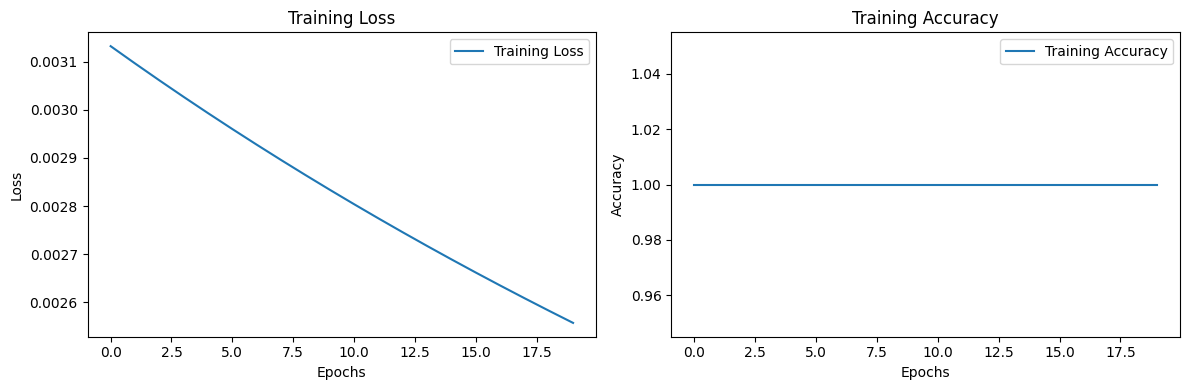

In [ ]:
# Define activation functions and their derivatives
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

def sigmoid_derivative(z):
    a = sigmoid(z)
    return a * (1 - a)

# Initialise weights and biases for hidden layer
W_1 = np.array([[0.2, 0.9], [0.6, 0.6]])
b_1 = np.array([0.8, 0.9])

# Initialise weights and biases for output layer
W_2 = np.array([[0.9], [0.4]])
b_2 = np.array([0.9])

# Define the input data
X = np.array([[0.3, 0.4]])

# Define the target
y = np.array([[1]])

# Training parameters
learning_rate = 0.2
epochs = 20

# Lists to store loss and accuracy
loss_history = []
accuracy_history = []

for epoch in range(epochs):
    # Forward pass through hidden layer
    Z_1 = np.dot(X, W_1) + b_1
    A_1 = relu(Z_1)

    # Forward pass through output layer
    Z_2 = np.dot(A_1, W_2) + b_2
    A_2 = sigmoid(Z_2)

    # Compute the loss
    loss = 0.5 * np.mean((A_2 - y) ** 2)
    loss_history.append(loss)

    # Compute the accuracy
    accuracy = np.mean((A_2 > 0.5) == y)
    accuracy_history.append(accuracy)

    # Backward pass through the output layer
    loss_derivative = A_2 - y
    output_layer_grad = loss_derivative * sigmoid_derivative(Z_2)
    output_weights_grad = np.dot(A_1.T, output_layer_grad)
    output_biases_grad = np.sum(output_layer_grad, axis=0)

    # Backward pass through the hidden layer
    hidden_layer_grad = np.dot(output_layer_grad, W_2.T) * relu_derivative(Z_1)
    hidden_weights_grad = np.dot(X.T, hidden_layer_grad)
    hidden_biases_grad = np.sum(hidden_layer_grad, axis=0)

    # Update the weights and biases using gradient descent
    W_1 -= learning_rate * hidden_weights_grad
    b_1 -= learning_rate * hidden_biases_grad
    W_2 -= learning_rate * output_weights_grad
    b_2 -= learning_rate * output_biases_grad

    # Print updated weights and biases for debugging
    print(f"Epoch {epoch + 1}/{epochs}")
    print("Updated Hidden Layer Weights:", W_1)
    print("Updated Hidden Layer Biases:", b_1)
    print("Updated Output Layer Weights:", W_2)
    print("Updated Output Layer Biases:", b_2)

# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy_history, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy')

plt.tight_layout()
plt.show()
